In [1]:
import numpy as np
import pandas as pd

## Скачиваем смотрим соединяем

In [2]:
X_train_val = pd.read_csv('train_features.csv', header=0)
y_train_val = pd.read_csv('train_targets.csv', header=0)
X_test = pd.read_csv('test_features.csv', header=0)
y_test = pd.read_csv('sample_submission.csv')
X_train_val.shape, y_train_val.shape, X_test.shape, y_test.shape

((5808, 11), (5808, 5), (3984, 11), (3984, 5))

In [3]:
X_train_val.head(3)

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate
0,2020-01-01 00:00:00,70.855017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.982789
1,2020-01-01 00:30:00,70.826582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.965098
2,2020-01-01 01:00:00,70.809637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.867409


In [4]:
y_train_val.head(3)

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-01-01 00:00:00,4.561979,39.015486,17.250740,24.301793
1,2020-01-01 00:30:00,4.550741,39.048915,17.229506,24.257461
2,2020-01-01 01:00:00,4.506793,38.766378,17.171621,24.236298


In [5]:
X_test.head(3)

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate
0,2020-05-01 00:00:00,71.428342,0.267832,5.135159,36.816480,16.632260,24.062587,5.696004,4.939430,6.395286,74.273009
1,2020-05-01 00:30:00,70.925118,0.268464,5.149646,36.869023,16.651870,24.069800,5.676384,4.911872,6.346957,74.061833
2,2020-05-01 01:00:00,70.991719,0.270641,5.154615,37.074965,16.710967,24.106152,5.574873,4.808516,6.242636,73.856268


In [6]:
y_test.head(3)

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264


In [7]:
for data in [X_train_val, X_test, y_train_val, y_test]:
    data.timestamp = pd.to_datetime(data.timestamp, format='%Y-%m-%d %H:%M:%S')

In [8]:
t_train_start, t_train_end, t_test_start, t_test_end = X_train_val.timestamp.min(), X_train_val.timestamp.max(), \
                                                       X_test.timestamp.min(), X_test.timestamp.max()
t_train_start, t_train_end, t_test_start, t_test_end

(Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-04-30 23:30:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-07-22 23:30:00'))

In [9]:
# subm = pd.merge(X_test, y_test, on='timestamp').loc[:, ['timestamp', 'A_C2H6', 'A_C3H8', 'A_iC4H10', 'A_nC4H10']]
# subm.columns = ['timestamp', 'B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10']
# subm.fillna(method='ffill', inplace=True)
# subm.to_csv('submission_1.csv', index=False, header=True) ################### 3.6913

In [10]:
Xy_train_val = pd.merge(X_train_val, y_train_val, on='timestamp')
Xy_train_val.head(3)

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-01-01 00:00:00,70.855017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.982789,4.561979,39.015486,17.250740,24.301793
1,2020-01-01 00:30:00,70.826582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.965098,4.550741,39.048915,17.229506,24.257461
2,2020-01-01 01:00:00,70.809637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.867409,4.506793,38.766378,17.171621,24.236298


In [11]:
Xy_test = pd.merge(X_test, y_test, on='timestamp')
Xy_test.set_index('timestamp', inplace=True)
Xy_test.head(3)

,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
timestamp,,,,,,,,,,,,,,
2020-05-01 00:00:00,71.428342,0.267832,5.135159,36.816480,16.632260,24.062587,5.696004,4.939430,6.395286,74.273009,4.363701,37.742757,16.843028,24.171264
2020-05-01 00:30:00,70.925118,0.268464,5.149646,36.869023,16.651870,24.069800,5.676384,4.911872,6.346957,74.061833,4.363701,37.742757,16.843028,24.171264
2020-05-01 01:00:00,70.991719,0.270641,5.154615,37.074965,16.710967,24.106152,5.574873,4.808516,6.242636,73.856268,4.363701,37.742757,16.843028,24.171264


In [12]:
X_test.dropna()

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate
0,2020-05-01 00:00:00,71.428342,0.267832,5.135159,36.816480,16.632260,24.062587,5.696004,4.939430,6.395286,74.273009
1,2020-05-01 00:30:00,70.925118,0.268464,5.149646,36.869023,16.651870,24.069800,5.676384,4.911872,6.346957,74.061833
2,2020-05-01 01:00:00,70.991719,0.270641,5.154615,37.074965,16.710967,24.106152,5.574873,4.808516,6.242636,73.856268
3,2020-05-01 01:30:00,70.972406,0.275241,5.230661,37.384180,16.683337,24.021993,5.514843,4.730887,6.101647,73.750744
4,2020-05-01 02:00:00,70.980078,0.275062,5.241437,37.448587,16.663863,24.003237,5.524898,4.728882,6.057119,73.698447
...,...,...,...,...,...,...,...,...,...,...,...
3979,2020-07-22 21:30:00,72.600912,0.120985,4.328092,40.875930,17.741460,24.098520,4.469224,3.619095,4.686205,75.486026
3980,2020-07-22 22:00:00,72.107049,0.110734,4.013567,38.871418,17.449352,24.049532,4.770699,3.988215,6.689777,75.370451
3981,2020-07-22 22:30:00,71.805799,0.111535,4.041506,39.794323,17.635380,24.169473,4.613603,3.790651,5.785216,74.985878
3982,2020-07-22 23:00:00,72.112046,0.119362,4.131432,40.461503,17.758833,24.211013,4.504242,3.657459,5.094626,74.766867


In [13]:
Xy_train_val.shape, Xy_test.shape

((5808, 15), (3984, 14))

## Графики

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

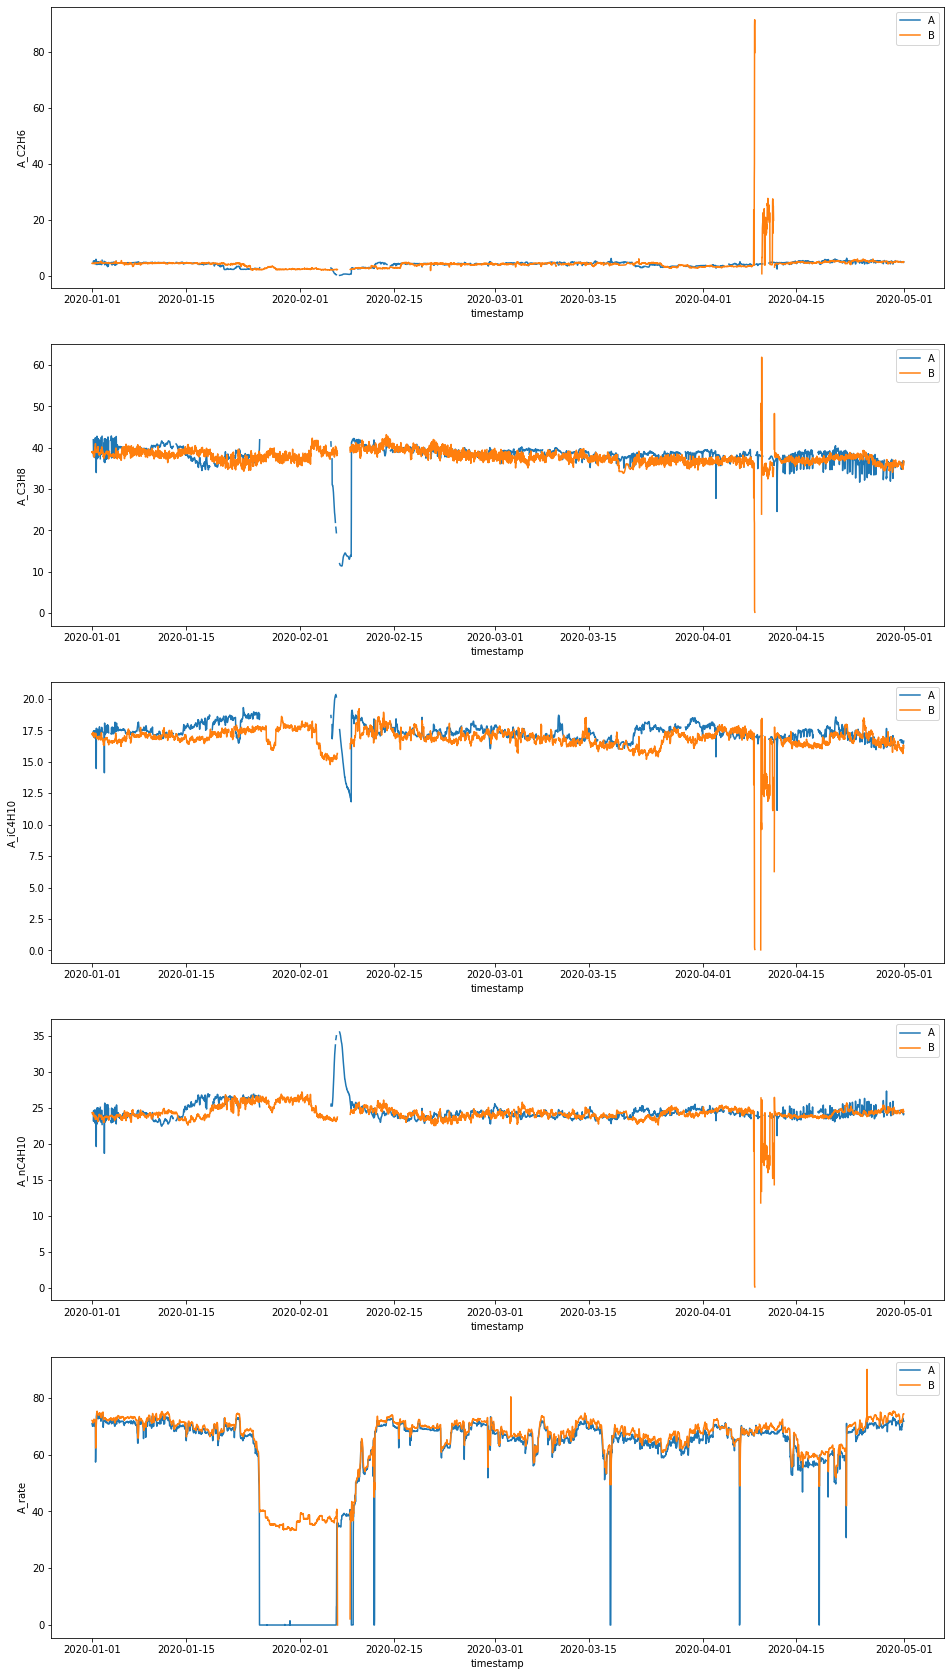

In [15]:
fig, ax = plt.subplots(5, 1, figsize=(16, 30))

sns.lineplot(data=Xy_train_val, x='timestamp', y='A_C2H6', ax=ax[0], label='A')
sns.lineplot(data=Xy_train_val, x='timestamp', y='B_C2H6', ax=ax[0], label='B')

sns.lineplot(data=Xy_train_val, x='timestamp', y='A_C3H8', ax=ax[1], label='A')
sns.lineplot(data=Xy_train_val, x='timestamp', y='B_C3H8', ax=ax[1], label='B')

sns.lineplot(data=Xy_train_val, x='timestamp', y='A_iC4H10', ax=ax[2], label='A')
sns.lineplot(data=Xy_train_val, x='timestamp', y='B_iC4H10', ax=ax[2], label='B')

sns.lineplot(data=Xy_train_val, x='timestamp', y='A_nC4H10', ax=ax[3], label='A')
sns.lineplot(data=Xy_train_val, x='timestamp', y='B_nC4H10', ax=ax[3], label='B')

sns.lineplot(data=Xy_train_val, x='timestamp', y='A_rate', ax=ax[4], label='A')
sns.lineplot(data=Xy_train_val, x='timestamp', y='B_rate', ax=ax[4], label='B')

plt.show()

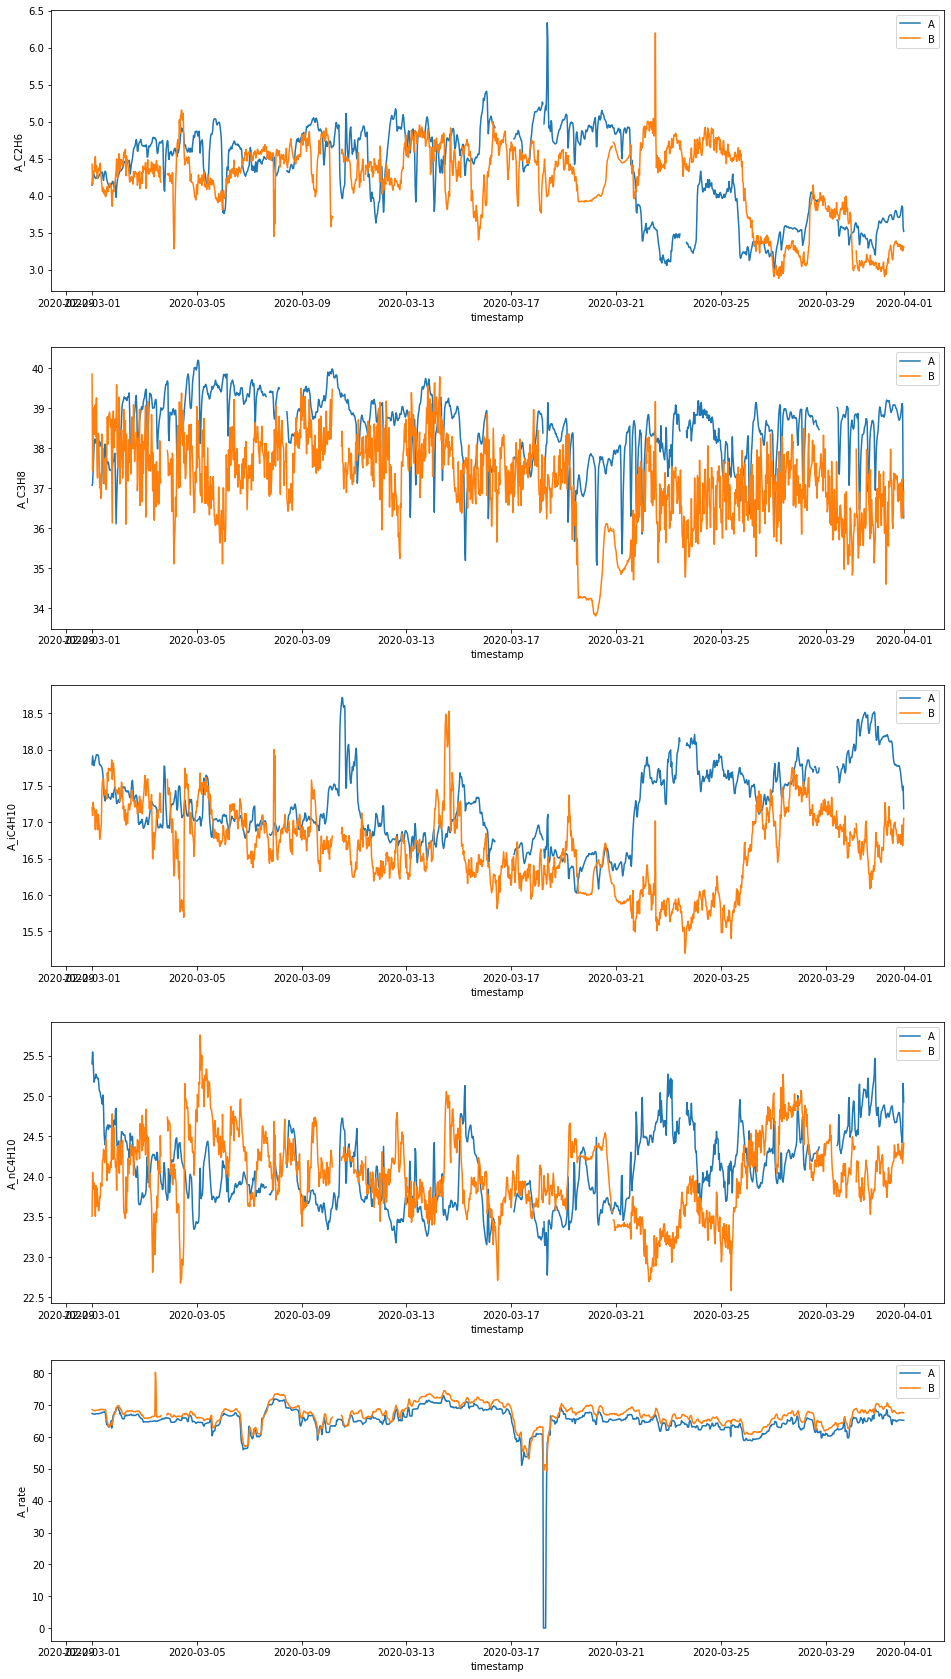

In [16]:
fig, ax = plt.subplots(5, 1, figsize=(16, 30))

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='A_C2H6', ax=ax[0], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='B_C2H6', ax=ax[0], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='A_C3H8', ax=ax[1], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='B_C3H8', ax=ax[1], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='A_iC4H10', ax=ax[2], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='B_iC4H10', ax=ax[2], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='A_nC4H10', ax=ax[3], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='B_nC4H10', ax=ax[3], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='A_rate', ax=ax[4], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(3, 3)], x='timestamp', y='B_rate', ax=ax[4], label='B')

plt.show()

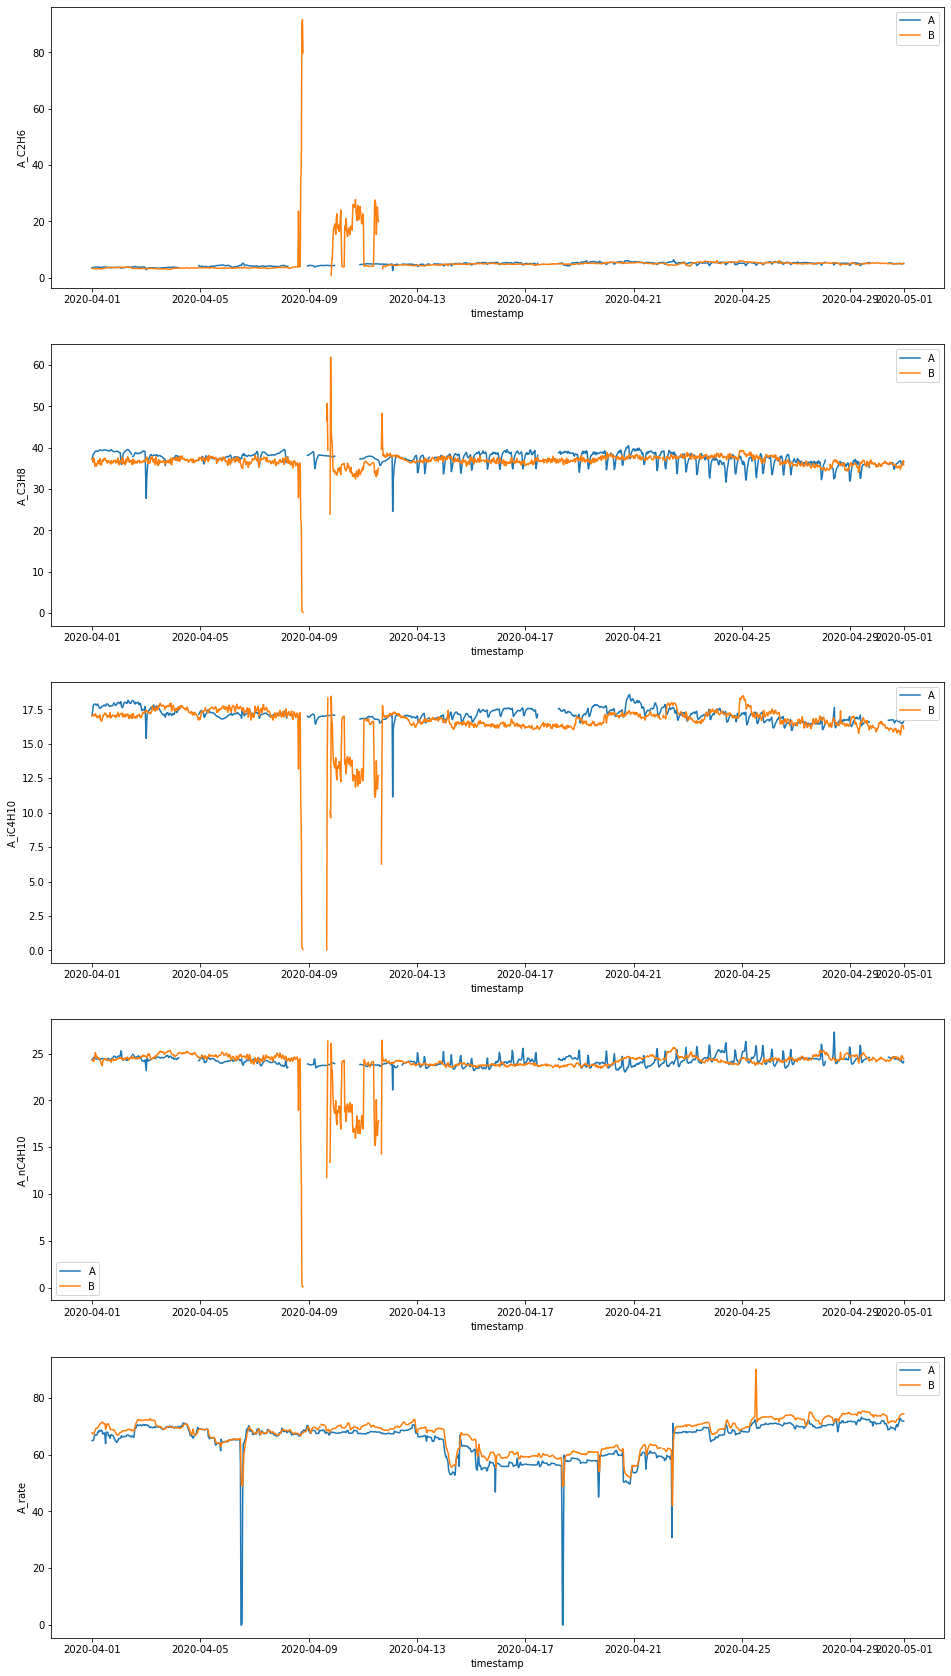

In [17]:
fig, ax = plt.subplots(5, 1, figsize=(16, 30))

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='A_C2H6', ax=ax[0], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='B_C2H6', ax=ax[0], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='A_C3H8', ax=ax[1], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='B_C3H8', ax=ax[1], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='A_iC4H10', ax=ax[2], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='B_iC4H10', ax=ax[2], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='A_nC4H10', ax=ax[3], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='B_nC4H10', ax=ax[3], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='A_rate', ax=ax[4], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.timestamp.dt.month.between(4, 4)], x='timestamp', y='B_rate', ax=ax[4], label='B')

plt.show()

<AxesSubplot:>

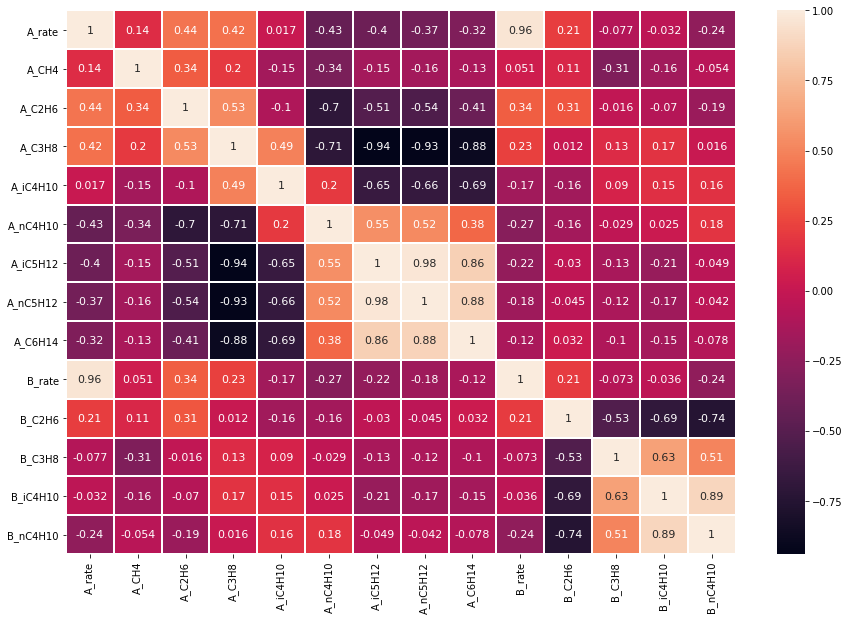

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(Xy_train_val.corr(), annot=True, annot_kws={'size': 11}, linewidths=1)

<AxesSubplot:>

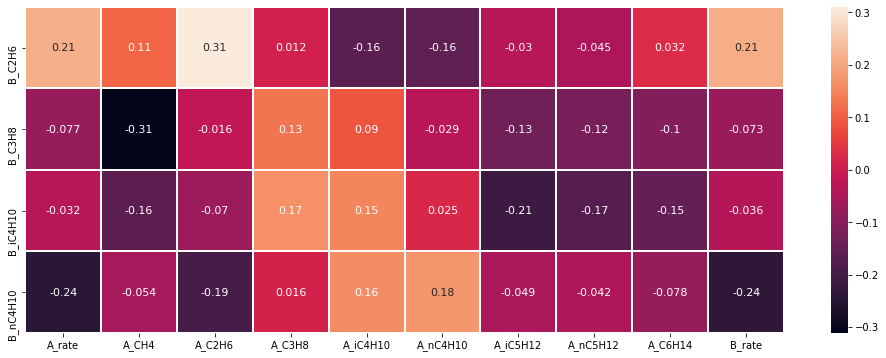

In [19]:
plt.figure(figsize=(17, 6))
sns.heatmap(Xy_train_val.corr().iloc[10:, :10], annot=True, annot_kws={'size': 11}, linewidths=1)

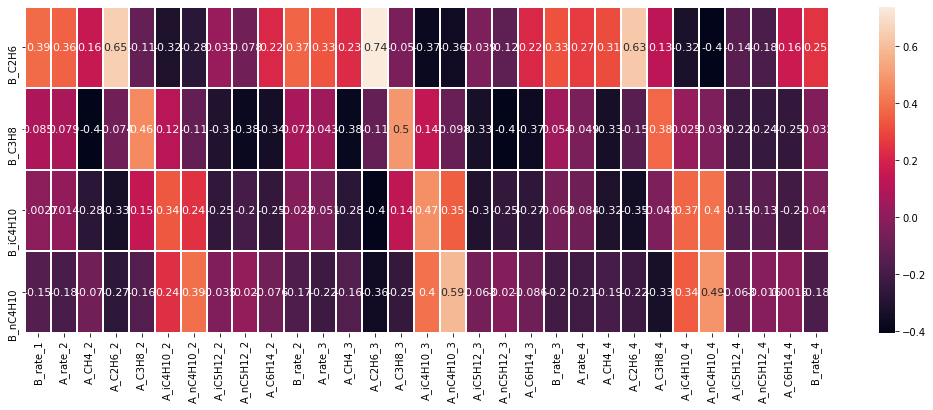

In [20]:
Xy_train_plt = pd.concat([Xy_train_val,
                          Xy_train_val.loc[:, 'A_rate':'B_rate'].shift(1),
                          Xy_train_val.loc[:, 'A_rate':'B_rate'].shift(72),
                          Xy_train_val.loc[:, 'A_rate':'B_rate'].shift(144),
                          Xy_train_val.loc[:, 'A_rate':'B_rate'].shift(288)], axis=1)

Xy_train_plt.columns = Xy_train_val.columns.to_list() + \
                        [col + '_1' for col in Xy_train_plt.columns.to_list()[1:11]] + \
                        [col + '_2' for col in Xy_train_plt.columns.to_list()[1:11]] + \
                        [col + '_3' for col in Xy_train_plt.columns.to_list()[1:11]] + \
                        [col + '_4' for col in Xy_train_plt.columns.to_list()[1:11]]

plt.figure(figsize=(18, 6))
sns.heatmap(Xy_train_plt.corr(method='spearman').drop(columns=['B_C2H6', 'B_C3H8', 
                                                               'B_iC4H10', 'B_nC4H10']).loc['B_C2H6':'B_nC4H10', 
                                                                                            'B_rate_1':],
            annot=True, annot_kws={'size': 11}, linewidths=1)
plt.show()

## Заменяем выбросы на наны и интерполируем

In [21]:
Xy_train_val = Xy_train_val.iloc[9:]
Xy_train_val.set_index('timestamp', inplace=True)

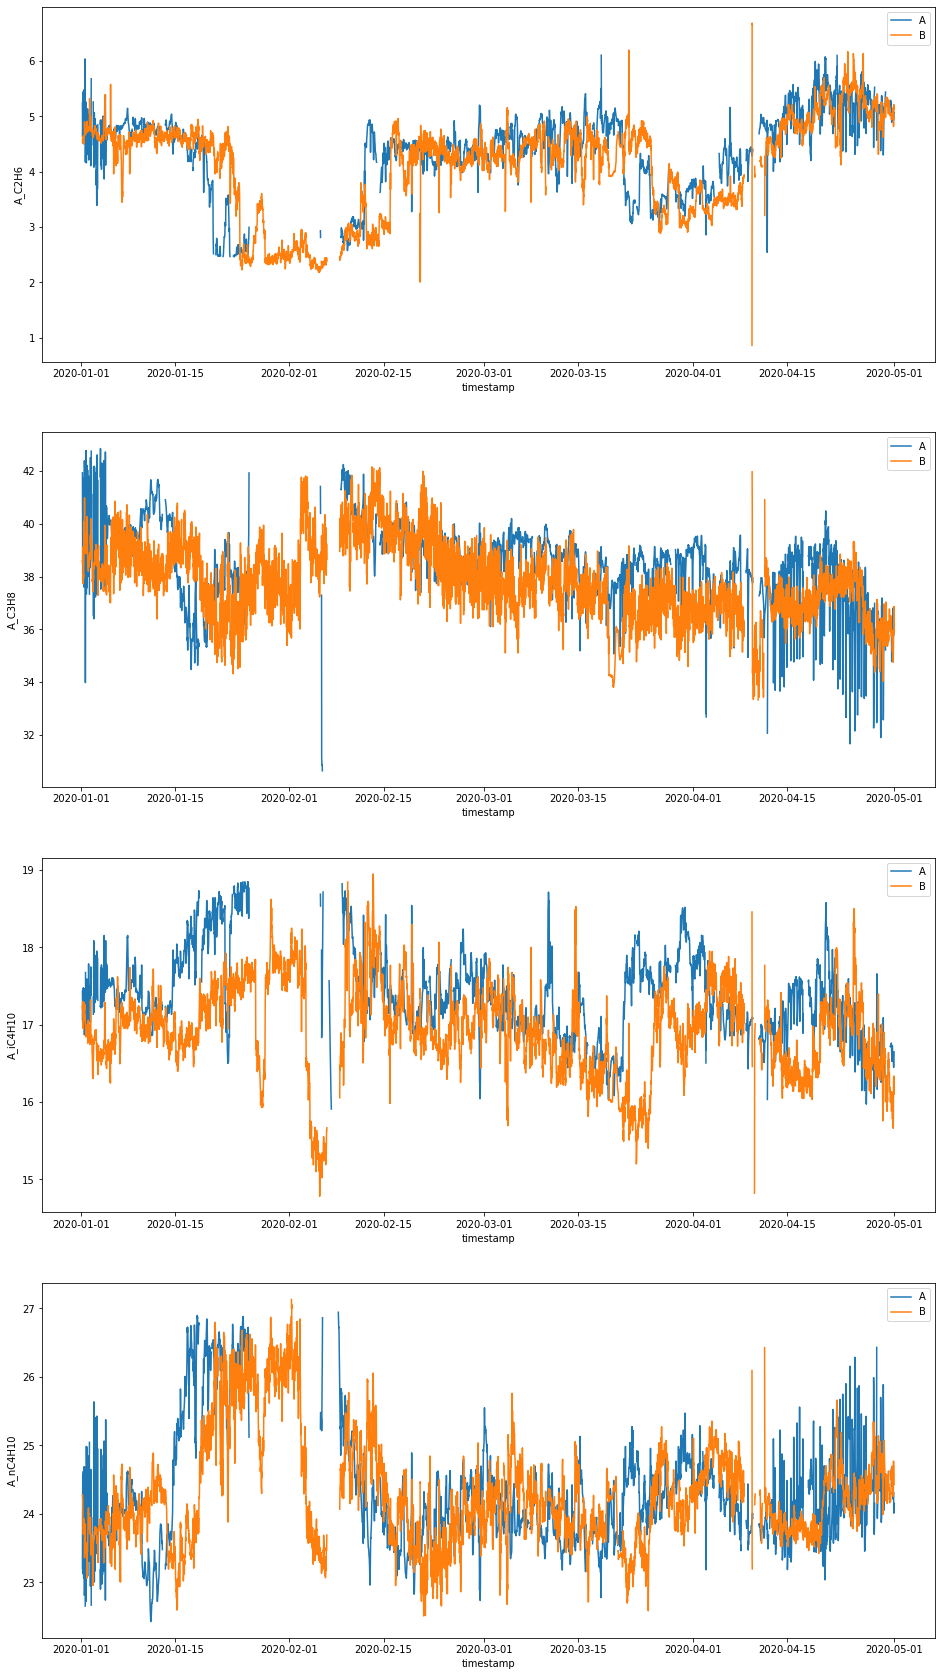

In [22]:
Xy_train_plt = Xy_train_val.mask(Xy_train_val.sub(Xy_train_val.mean()).div(Xy_train_val.std()).abs().gt(2))

fig, ax = plt.subplots(4, 1, figsize=(16, 30))

sns.lineplot(data=Xy_train_plt, x='timestamp', y='A_C2H6', ax=ax[0], label='A')
sns.lineplot(data=Xy_train_plt, x='timestamp', y='B_C2H6', ax=ax[0], label='B')

sns.lineplot(data=Xy_train_plt, x='timestamp', y='A_C3H8', ax=ax[1], label='A')
sns.lineplot(data=Xy_train_plt, x='timestamp', y='B_C3H8', ax=ax[1], label='B')

sns.lineplot(data=Xy_train_plt, x='timestamp', y='A_iC4H10', ax=ax[2], label='A')
sns.lineplot(data=Xy_train_plt, x='timestamp', y='B_iC4H10', ax=ax[2], label='B')

sns.lineplot(data=Xy_train_plt, x='timestamp', y='A_nC4H10', ax=ax[3], label='A')
sns.lineplot(data=Xy_train_plt, x='timestamp', y='B_nC4H10', ax=ax[3], label='B')

plt.show()

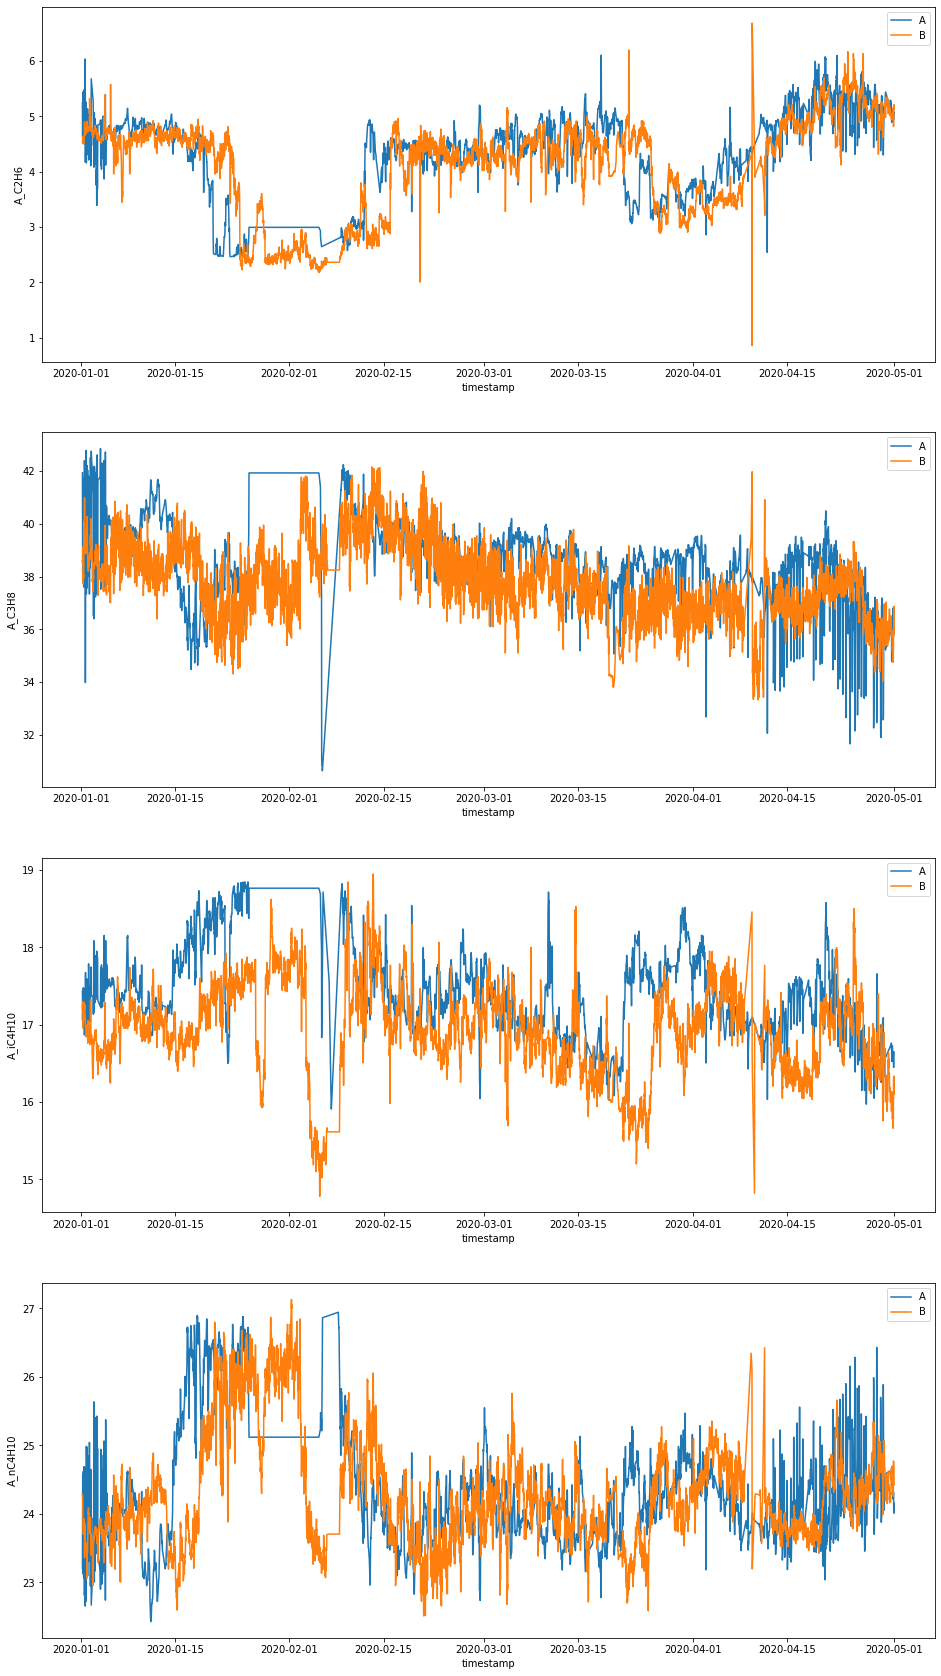

In [23]:
Xy_train_plt = Xy_train_plt.interpolate(method='linear')

fig, ax = plt.subplots(4, 1, figsize=(16, 30))

sns.lineplot(data=Xy_train_plt, x='timestamp', y='A_C2H6', ax=ax[0], label='A')
sns.lineplot(data=Xy_train_plt, x='timestamp', y='B_C2H6', ax=ax[0], label='B')

sns.lineplot(data=Xy_train_plt, x='timestamp', y='A_C3H8', ax=ax[1], label='A')
sns.lineplot(data=Xy_train_plt, x='timestamp', y='B_C3H8', ax=ax[1], label='B')

sns.lineplot(data=Xy_train_plt, x='timestamp', y='A_iC4H10', ax=ax[2], label='A')
sns.lineplot(data=Xy_train_plt, x='timestamp', y='B_iC4H10', ax=ax[2], label='B')

sns.lineplot(data=Xy_train_plt, x='timestamp', y='A_nC4H10', ax=ax[3], label='A')
sns.lineplot(data=Xy_train_plt, x='timestamp', y='B_nC4H10', ax=ax[3], label='B')

plt.show()

In [24]:
for data in [Xy_train_plt, Xy_test]:
    data['day_of_month'] = data.index.day.to_numpy()
    data['day_of_week'] = data.index.dayofweek.to_numpy()
    data['hour'] = data.index.hour.to_numpy()

In [25]:
Xy = pd.concat([Xy_train_plt, Xy_test], axis=0)
Xy.head(3)

,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,,,
2020-01-01 04:30:00,71.055792,0.126244,5.242957,41.941480,17.064213,23.205953,4.184848,4.062079,4.110170,71.389674,4.532649,38.604149,17.238489,24.275393,1,2,4
2020-01-01 05:00:00,71.029881,0.111301,4.632455,39.198330,17.440245,24.331520,4.615703,4.545702,5.072316,71.792506,4.578543,38.510623,17.193441,24.242152,1,2,5
2020-01-01 05:30:00,71.008884,0.125176,4.730933,37.874656,17.353362,24.567692,4.847911,4.818913,5.626975,71.939558,4.642879,39.124029,17.301609,24.211492,1,2,5


In [26]:
Xy_exp = pd.concat([Xy, 
                    Xy.loc[:, 'A_rate':'B_rate'].shift(1),
                    Xy.loc[:, 'A_rate':'B_rate'].shift(72)], axis=1)
Xy_exp.columns = Xy.columns.to_list() + [col + '_1' for col in Xy.columns.to_list()[1:11]] + \
                                        [col + '_72' for col in Xy.columns.to_list()[1:11]]

In [27]:
Xy_exp = Xy_exp.iloc[72:]

In [28]:
Xy_exp.loc[t_train_start:t_train_end].dropna().shape, Xy_exp.loc[t_test_start:t_test_end].shape

((5727, 37), (3984, 37))

In [29]:
Xy_exp_train, Xy_exp_test = Xy_exp.loc[t_train_start:t_train_end], Xy_exp.loc[t_test_start:t_test_end]

In [30]:
values_for_filling_na = Xy_exp_train.mean(axis=0).values
for i, col in enumerate(Xy_exp_train.columns):
    Xy_exp_train[col].fillna(values_for_filling_na[i], inplace=True)
    Xy_exp_test[col].fillna(values_for_filling_na[i], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [31]:
Xy_exp_train.shape, Xy_exp_test.shape

((5727, 37), (3984, 37))

In [32]:
Xy_exp_train = Xy_exp_train.iloc[4:]

In [33]:
Xy_exp_train.columns

Index(['A_rate', 'A_CH4', 'A_C2H6', 'A_C3H8', 'A_iC4H10', 'A_nC4H10',
       'A_iC5H12', 'A_nC5H12', 'A_C6H14', 'B_rate', 'B_C2H6', 'B_C3H8',
       'B_iC4H10', 'B_nC4H10', 'day_of_month', 'day_of_week', 'hour',
       'A_CH4_1', 'A_C2H6_1', 'A_C3H8_1', 'A_iC4H10_1', 'A_nC4H10_1',
       'A_iC5H12_1', 'A_nC5H12_1', 'A_C6H14_1', 'B_rate_1', 'B_C2H6_1',
       'A_CH4_72', 'A_C2H6_72', 'A_C3H8_72', 'A_iC4H10_72', 'A_nC4H10_72',
       'A_iC5H12_72', 'A_nC5H12_72', 'A_C6H14_72', 'B_rate_72', 'B_C2H6_72'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(Xy_exp_train.drop(columns=['B_C2H6', 'B_C3H8', 
                                                                                'B_iC4H10', 'B_nC4H10']), 
                                                      Xy_exp_train.loc[:, ['B_C2H6', 'B_C3H8', 
                                                                           'B_iC4H10', 'B_nC4H10']], 
                                                      test_size=0.3, shuffle=False)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((4006, 33), (1717, 33), (4006, 4), (1717, 4))

In [35]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [41]:
# models = {}
# for col in y_train.columns:
#     reg = LGBMRegressor(learning_rate=0.01, colsample_bytree=0.4, 
#                         max_depth=9, objective='mape').fit(X_train, y_train[col])
#     models[col] = reg

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


In [45]:
models = {}
for col in y_train.columns:
    reg = CatBoostRegressor(eta=0.01, n_estimators=1000, allow_writing_files=False, verbose=200, max_depth=5, 
                            objective='MAPE', 
                            cat_features=['day_of_month', 'day_of_week', 'hour']).fit(X_train, y_train[col])
    models[col] = reg

0:	learn: 0.2113059	total: 16.7ms	remaining: 16.7s
200:	learn: 0.0694840	total: 2.02s	remaining: 8.05s
400:	learn: 0.0492292	total: 3.29s	remaining: 4.91s
600:	learn: 0.0450576	total: 5.06s	remaining: 3.36s
800:	learn: 0.0415828	total: 6.43s	remaining: 1.6s
999:	learn: 0.0387886	total: 7.71s	remaining: 0us
0:	learn: 0.0282713	total: 7.21ms	remaining: 7.2s
200:	learn: 0.0185318	total: 1.37s	remaining: 5.43s
400:	learn: 0.0165630	total: 2.63s	remaining: 3.93s
600:	learn: 0.0157273	total: 3.93s	remaining: 2.61s
800:	learn: 0.0150947	total: 5.16s	remaining: 1.28s
999:	learn: 0.0145684	total: 6.47s	remaining: 0us
0:	learn: 0.0300140	total: 6.38ms	remaining: 6.37s
200:	learn: 0.0145726	total: 1.29s	remaining: 5.12s
400:	learn: 0.0125312	total: 2.48s	remaining: 3.71s
600:	learn: 0.0114131	total: 3.67s	remaining: 2.44s
800:	learn: 0.0106553	total: 4.84s	remaining: 1.2s
999:	learn: 0.0100672	total: 5.99s	remaining: 0us
0:	learn: 0.0272606	total: 5.37ms	remaining: 5.36s
200:	learn: 0.0130450	tot

In [46]:
y_train_pred = y_train.copy()
y_valid_pred = y_valid.copy()
for col in y_train.columns:
    y_train_pred[col] = models[col].predict(X_train)
    y_valid_pred[col] = models[col].predict(X_valid)

In [47]:
mape = lambda y_true, y_pred: np.mean(((y_true - y_pred) / y_true).abs().mean().values) * 100

In [48]:
mape(y_train, y_train_pred), mape(y_valid, y_valid_pred)

(1.7441522725510754, 6.938166964232274)

In [54]:
X = Xy_exp_train.drop(columns=['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10'])
y = Xy_exp_train.loc[:, ['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10']]

In [60]:
from hyperopt import hp, fmin, tpe

In [77]:
def return_best_model(X_tr, y_tr, X_test, y_test, X, y, num_of_evals = 10):
    
    def hyperopt_opt_score(params):
        reg = CatBoostRegressor(allow_writing_files=False, verbose=False, **params, random_seed=42, objective='MAPE',
                                cat_features=['day_of_month', 'day_of_week', 'hour']).fit(X_tr, y_tr)
        
        y_pred = reg.predict(X_test)
        
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
    cb_space = {
        'eta': hp.uniform('eta', 0.01, 0.20),
        'n_estimators': hp.choice('n_estimators', np.arange(200, 1000, 100)),
        'depth': hp.choice('depth', np.arange(3, 8, 1)),
        'subsample': hp.uniform('subsample', 0.7, 1.0),
        'rsm': hp.uniform('rsm', 0.7, 1.0),
        'l2_leaf_reg': hp.choice('l2_leaf_reg', np.arange(3, 10, 2))
    }
    
    best_params = fmin(fn = hyperopt_opt_score, space = cb_space, algo = tpe.suggest, max_evals = num_of_evals)
    
    best_params['n_estimators'] = np.arange(200, 1000, 100)[best_params['n_estimators']]
    best_params['l2_leaf_reg'] = np.arange(3, 10, 2)[best_params['l2_leaf_reg']]
    best_params['depth'] = np.arange(3, 8, 1)[best_params['depth']]
    
    print(best_params)
    
    reg = CatBoostRegressor(allow_writing_files=False, verbose=200, **best_params, random_seed=42, objective='MAPE',
                            cat_features=['day_of_month', 'day_of_week', 'hour']).fit(X, y)
    return reg

In [78]:
models = {}
for col in y.columns:
    models[col] = return_best_model(X_train, y_train[col], X_valid, y_valid[col], X, y[col], num_of_evals = 100)

100%|██████████| 100/100 [06:15<00:00,  3.76s/trial, best loss: 18.470016631427267]
{'depth': 3, 'eta': 0.01815322766307824, 'l2_leaf_reg': 9, 'n_estimators': 200, 'rsm': 0.9916263694186147, 'subsample': 0.9314127893332251}
0:	learn: 0.2008484	total: 4.93ms	remaining: 982ms
199:	learn: 0.0782840	total: 925ms	remaining: 0us
100%|██████████| 100/100 [09:40<00:00,  5.80s/trial, best loss: 2.7827220317574315]
{'depth': 5, 'eta': 0.05414948186329574, 'l2_leaf_reg': 9, 'n_estimators': 500, 'rsm': 0.827653737799081, 'subsample': 0.7427606209782704}
0:	learn: 0.0290591	total: 7.14ms	remaining: 3.56s
200:	learn: 0.0148013	total: 1.51s	remaining: 2.24s
400:	learn: 0.0131005	total: 3.03s	remaining: 748ms
499:	learn: 0.0125719	total: 3.78s	remaining: 0us
100%|██████████| 100/100 [08:15<00:00,  4.96s/trial, best loss: 2.342224264160285]
{'depth': 3, 'eta': 0.01217193733785387, 'l2_leaf_reg': 9, 'n_estimators': 500, 'rsm': 0.7233662357814891, 'subsample': 0.8091969583736682}
0:	learn: 0.0282499	tota

In [81]:
models = {}
for col in y.columns:
#     reg = LGBMRegressor(learning_rate=0.01, colsample_bytree=0.4, 
#                         max_depth=9, objective='mape').fit(X, y[col])
    reg = CatBoostRegressor(eta=0.01, n_estimators=400, allow_writing_files=False, verbose=200, max_depth=5, 
                            objective='MAPE', 
                            cat_features=['day_of_month', 'day_of_week', 'hour']).fit(X, y[col])
    models[col] = reg

0:	learn: 0.2020665	total: 24.1ms	remaining: 9.61s
200:	learn: 0.0764910	total: 1.82s	remaining: 1.8s
399:	learn: 0.0586638	total: 4.65s	remaining: 0us
0:	learn: 0.0294983	total: 32ms	remaining: 12.8s
200:	learn: 0.0190875	total: 1.97s	remaining: 1.95s
399:	learn: 0.0171118	total: 3.56s	remaining: 0us
0:	learn: 0.0282188	total: 6.33ms	remaining: 2.52s
200:	learn: 0.0160906	total: 2.12s	remaining: 2.09s
399:	learn: 0.0139640	total: 3.89s	remaining: 0us
0:	learn: 0.0242745	total: 6.19ms	remaining: 2.47s
200:	learn: 0.0133672	total: 1.4s	remaining: 1.39s
399:	learn: 0.0115085	total: 3.34s	remaining: 0us


In [82]:
X_test = Xy_exp_test.drop(columns=['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10'])
y_pred = Xy_exp_test.loc[:, ['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10']].copy()
for col in y_pred.columns:
    y_pred[col] = models[col].predict(X_test)

In [83]:
y_pred.to_csv('submission_7.csv')